In [1]:
# single

In [2]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [3]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [4]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [5]:
# optimizer
ga = GA(
    dict(
        m = 100,
        x_rate = 0.5,
        m_rate = 0.5,
        weight_constraint = [-3.,3.],
        radioactive_rating = 0.1,
        grow_factor = 0.1,
        scale_hyperparameter = False,
        regularizer = None))

In [6]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy', 'precision', 'recall', 'f1'])

building layer 1 with 5
24
building layer 2 with 4
15


In [7]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 3
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 500
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [8]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [9]:
# learning phase
breakpoint = 100
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)
    

C:\Users\tcumi\github_repo\neural-network\python\ga.py:201: RuntimeWarning: overflow encountered in add
  self.population.sort(key=lambda p: p.fitness + np.random.uniform(-shift, shift, 1), reverse = self.aim)


Checkpoint 100, Accuracy: 0.9012345679012346, Loss: 0.3894681930541992
Checkpoint 200, Accuracy: 0.9135802469135802, Loss: 0.3499750561184353
Checkpoint 300, Accuracy: 0.9259259259259259, Loss: 0.31420244993986907
Checkpoint 400, Accuracy: 0.9382716049382716, Loss: 0.2841779390970866
Checkpoint 500, Accuracy: 0.9506172839506173, Loss: 0.25464298107005934


In [10]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [11]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.84200346 0.03734012 0.12065642]
[1. 0. 0.] <-> [0.9312122  0.04464346 0.02414437]
[0. 1. 0.] <-> [0.07397236 0.91282374 0.01320399]
[1. 0. 0.] <-> [0.91230816 0.03095641 0.05673538]
[0. 0. 1.] <-> [0.6895608  0.04073256 0.26970664]
[1. 0. 0.] <-> [0.92760843 0.03752393 0.03486759]
[1. 0. 0.] <-> [0.9032242  0.0495149  0.04726094]
[1. 0. 0.] <-> [0.90447485 0.0696659  0.02585923]
[1. 0. 0.] <-> [0.49286848 0.48689884 0.02023275]
[0. 1. 0.] <-> [0.0636278  0.92096573 0.01540648]
[0. 0. 1.] <-> [0.43277505 0.00416968 0.5630553 ]
[1. 0. 0.] <-> [0.87390035 0.06790917 0.05819053]
[0. 1. 0.] <-> [0.06715396 0.91827345 0.01457259]
[1. 0. 0.] <-> [0.9340154 0.033512  0.0324726]
[1. 0. 0.] <-> [0.6712189  0.03717899 0.29160216]
[1. 0. 0.] <-> [0.94072115 0.04063671 0.01864211]
[1. 0. 0.] <-> [0.91490436 0.01553532 0.06956034]
[1. 0. 0.] <-> [0.38341588 0.5847021  0.03188208]
[0. 0. 1.] <-> [0.70080346 0.02739039 0.27180615]
[1. 0. 0.] <-> [0.819422   0.00891899 0.17165895]
[0.

In [12]:
# Testing Performance

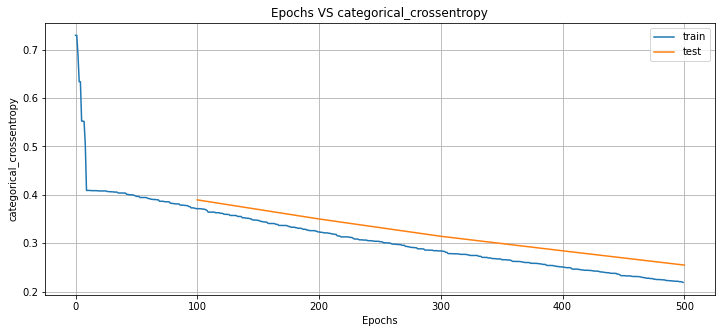

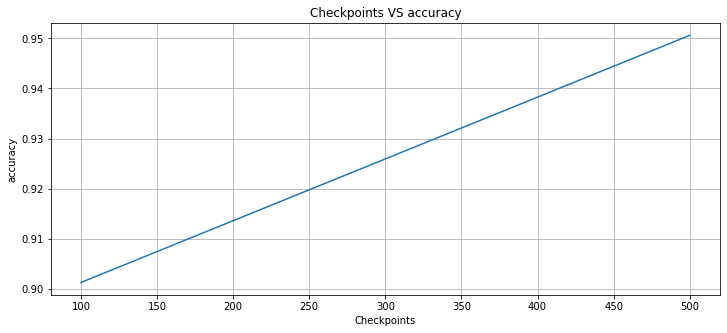

In [13]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [history, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [acc], x_label = 'Checkpoints', \
    y_label = 'accuracy')

In [14]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.9012345679012346, 'mean_square_error': 0.21163636216088635, 'categorical_crossentropy': 0.3894681930541992, 'precision': 0.8518518518518519, 'recall': 0.8518518518518519, 'f1': 0.8518518518518519, 'essential_metrics': {0: {'tp_hit': 76, 'fp_hit': 14, 'tn_hit': 16, 'fn_hit': 2}, 1: {'tp_hit': 16, 'fp_hit': 2, 'tn_hit': 90, 'fn_hit': 0}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 100} 


{'accuracy': 0.9135802469135802, 'mean_square_error': 0.1882763600408342, 'categorical_crossentropy': 0.3499750561184353, 'precision': 0.8703703703703703, 'recall': 0.8703703703703703, 'f1': 0.8703703703703703, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 13, 'tn_hit': 17, 'fn_hit': 1}, 1: {'tp_hit': 16, 'fp_hit': 1, 'tn_hit': 91, 'fn_hit': 0}, 2: {'tp_hit': 1, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 13}}, 'checkpoint': 200} 


{'accuracy': 0.9259259259259259, 'mean_square_error': 0.16660772979600919, 'categorical_crossentropy': 0.31420244993986907, 'precis

In [15]:
print(model)

Layer 1
Neuron 0: weights:
[-1.413122   2.9699295  2.8120782  0.4974648 -1.840344 ]
 bias: -2.864067554473877

Neuron 1: weights:
[-1.1469147   2.3166027   2.6449747   0.1252378  -0.38066563]
 bias: 2.3339099884033203

Neuron 2: weights:
[-2.5190506  -2.1986647   0.41669708  0.7003154   1.7385844 ]
 bias: 0.43490779399871826

Neuron 3: weights:
[-1.3592137  -0.05950842  1.3397932   2.5881479  -1.3069599 ]
 bias: 2.7547531127929688

$
Layer 2
Neuron 0: weights:
[-2.5817316  2.8131404 -2.5030668 -0.2277239]
 bias: 2.3227808475494385

Neuron 1: weights:
[ 3.         2.4635522 -1.666335   1.5020226]
 bias: -2.7395713329315186

Neuron 2: weights:
[-0.79605275 -0.21747269 -0.87181574 -2.569593  ]
 bias: 2.984588623046875

$

